## Imports and common data

In [1]:
import Simulator.simulator as simulator
from Strategies import Future, Future_Stoikov
import Simulator.get_info as get_info
import Simulator.load_data as load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../data/data_btc/'

In [2]:
run_time = pd.Timedelta(10, 'm').value
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [3]:
latency = pd.Timedelta(10, 'ms').value
md_latency = pd.Timedelta(10, 'ms').value
delay = pd.Timedelta(0.1, 's').value

In [4]:
reload(simulator)
reload(Future)
reload(Future_Stoikov)
reload(get_info)
reload(load_data)

<module 'Simulator.load_data' from 'c:\\Users\\Admin\\Desktop\\HFT\\Paper tasks 1\\hft_\\Simulator\\load_data.py'>

In [5]:
def run_Future(gamma):
    reload(simulator)
    reload(Future)
    reload(get_info)
    reload(load_data)

    sim = simulator.Sim(md, latency, md_latency)

    strat = Future.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

In [6]:
def run_Future_Stoikov(gamma):
    reload(simulator)
    reload(Future)
    reload(get_info)
    reload(load_data)

    sim = simulator.Sim(md, latency, md_latency)

    strat = Future_Stoikov.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

### Run all

In [7]:
logs_1 = run_Future(0.1)
logs_2 = run_Future_Stoikov(0.1)

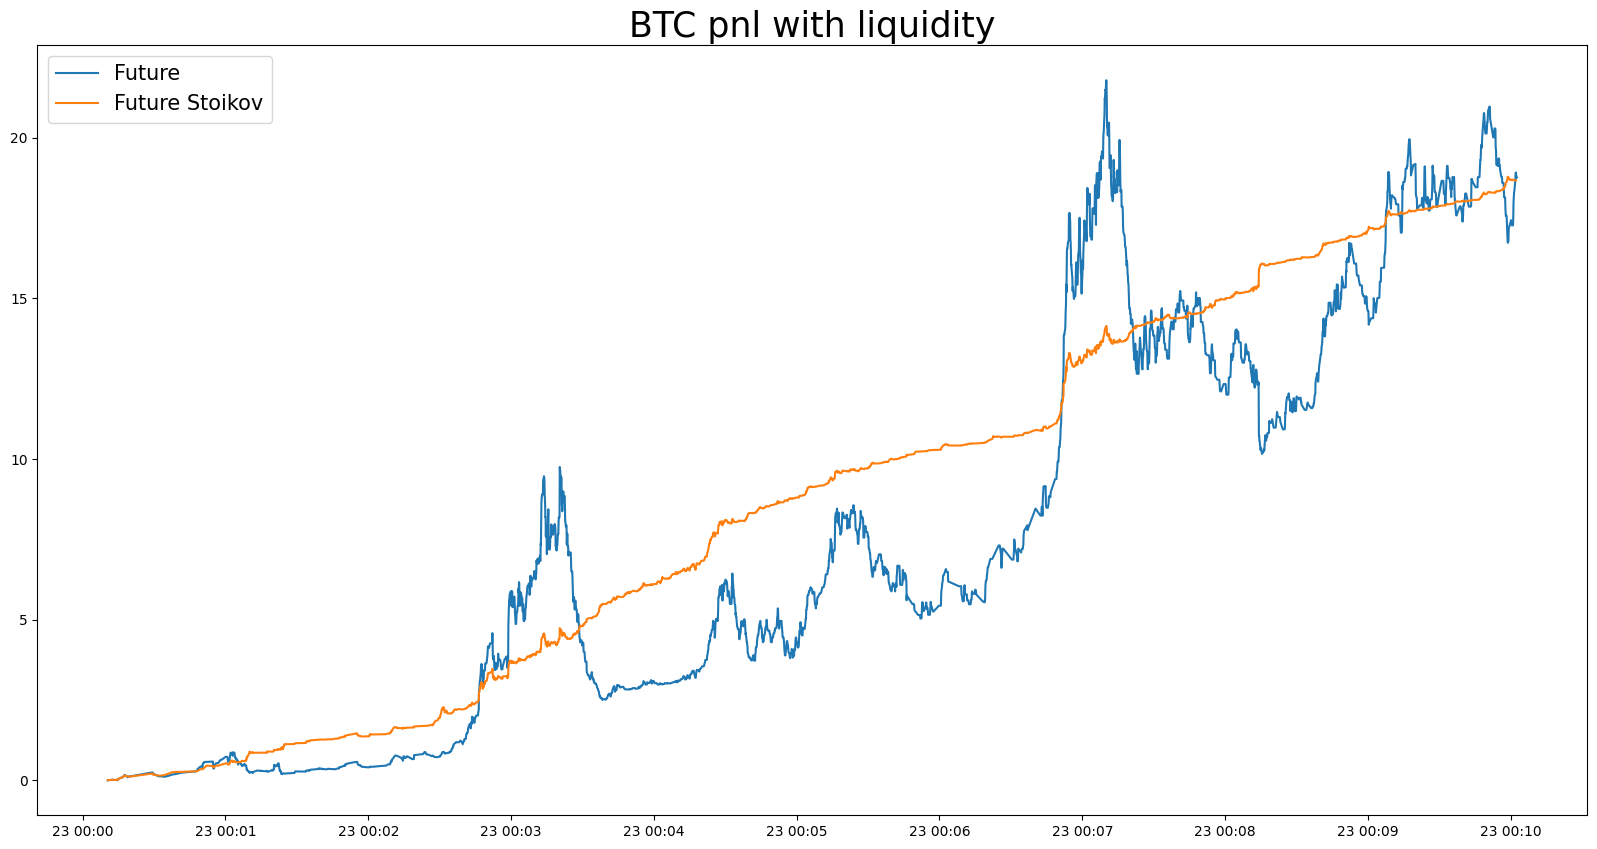

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['pnl_with_liq'], label="Future")
plt.plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['pnl_with_liq'], label="Future Stoikov")
plt.legend(fontsize=15)
plt.title('BTC pnl with liquidity', fontsize=25)
plt.plot()
plt.show()

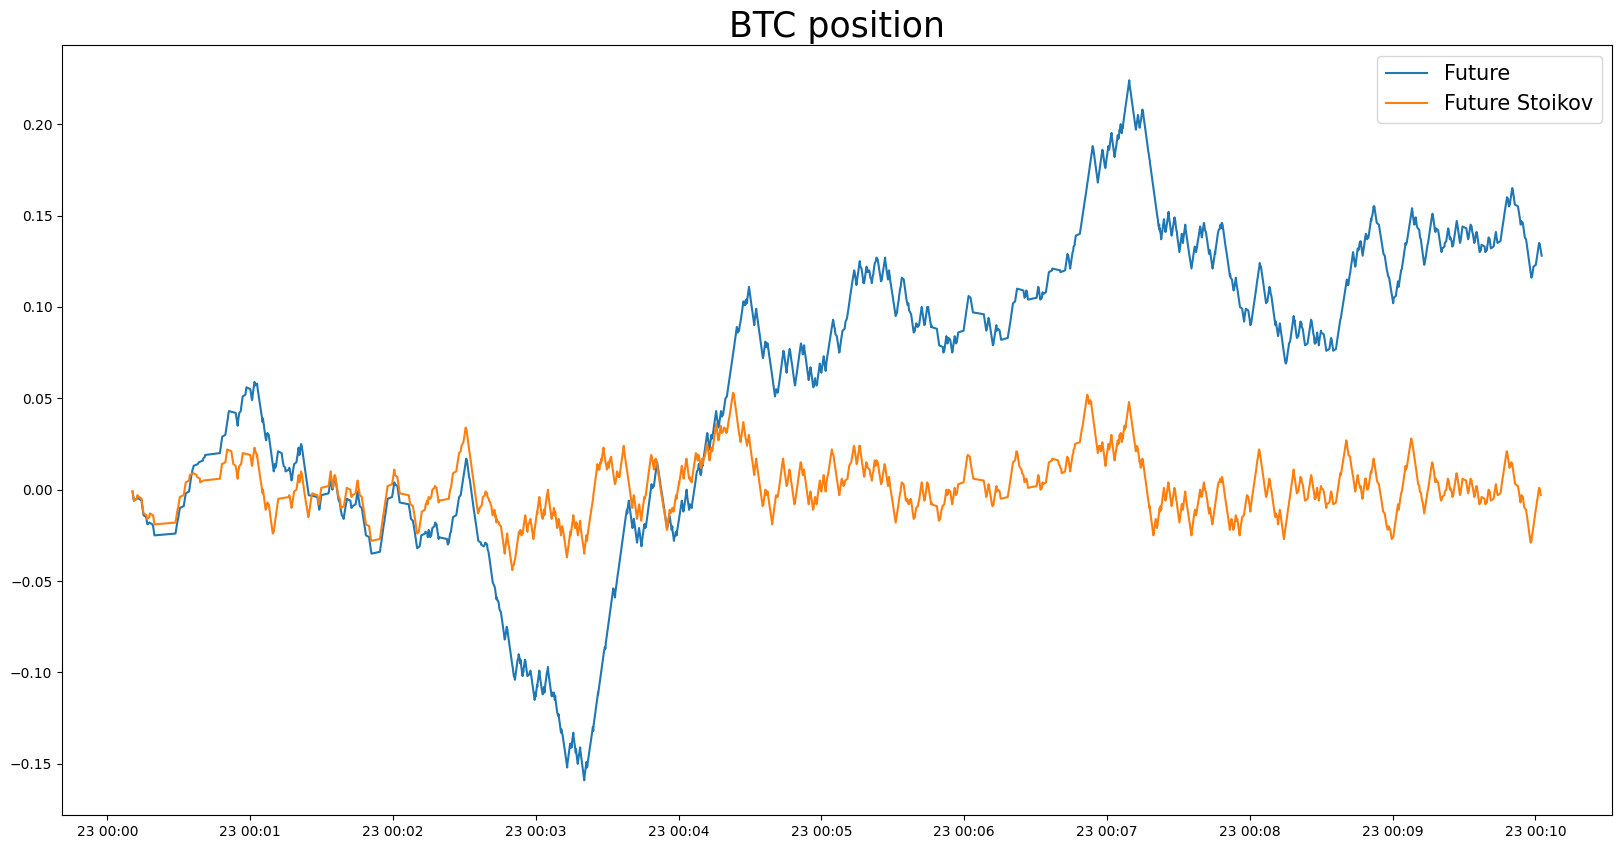

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['asset_position'], label="Future")
plt.plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['asset_position'], label="Future Stoikov")

plt.legend(fontsize=15)
plt.title('BTC position', fontsize=25)
plt.plot()
plt.show()

# Gamma

In [10]:
gammas = [0.0001, 0.001, 0.01, 0.1, 1]

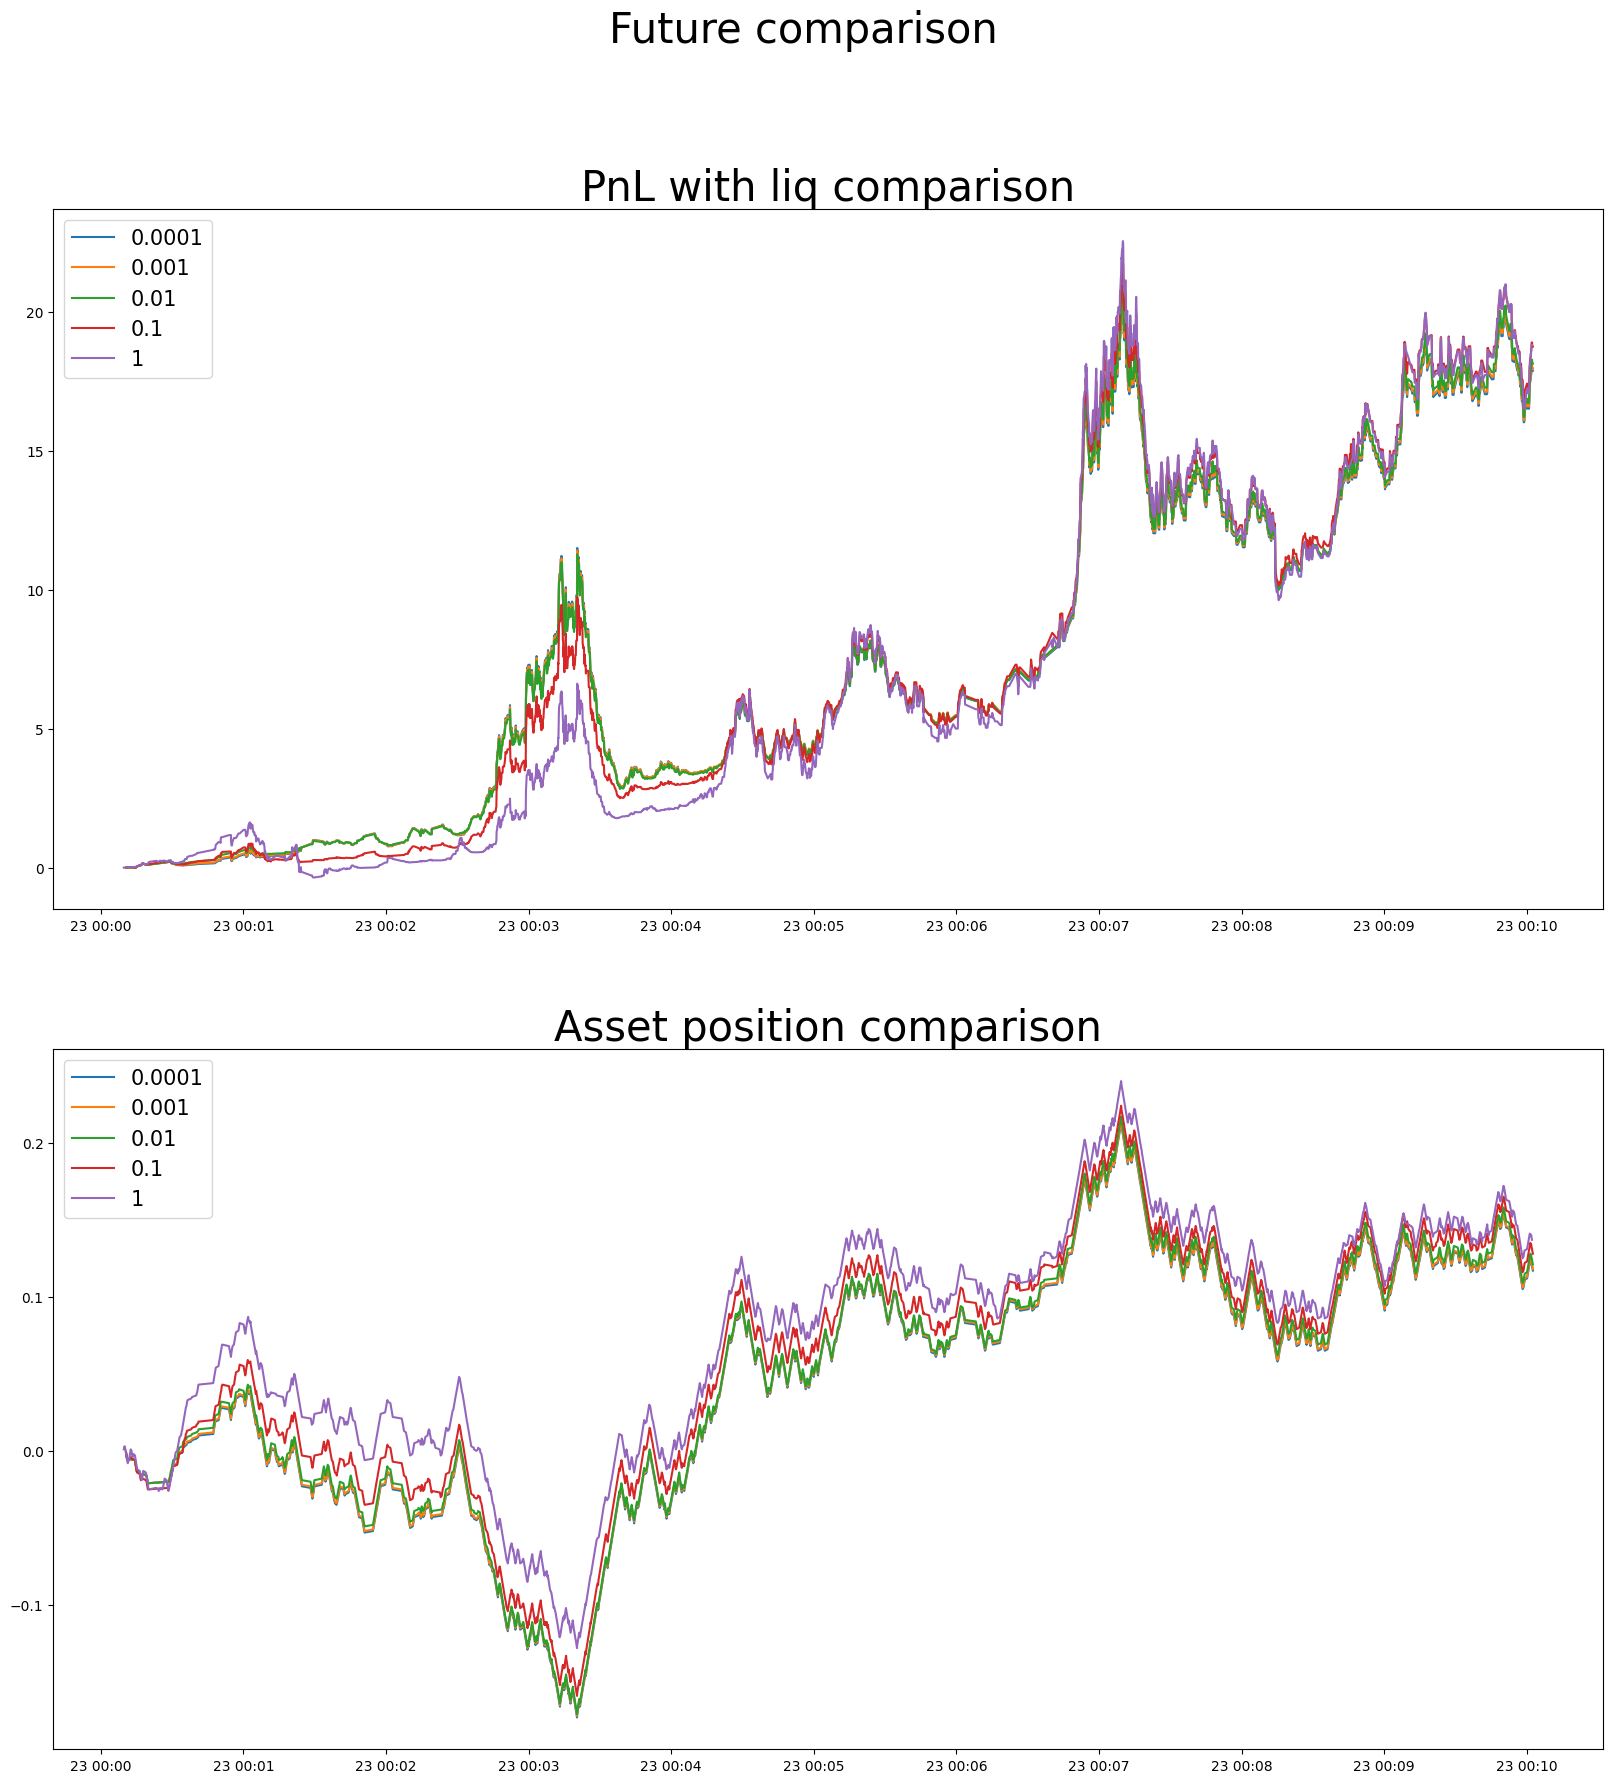

In [12]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future comparison", fontsize=30)

for gamma in gammas:
    logs_1 = run_Future(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['pnl_with_liq'], label=str(gamma))
    axs[1].plot(pd.to_datetime(logs_1['own_trade_time']), logs_1['asset_position'], label=str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()

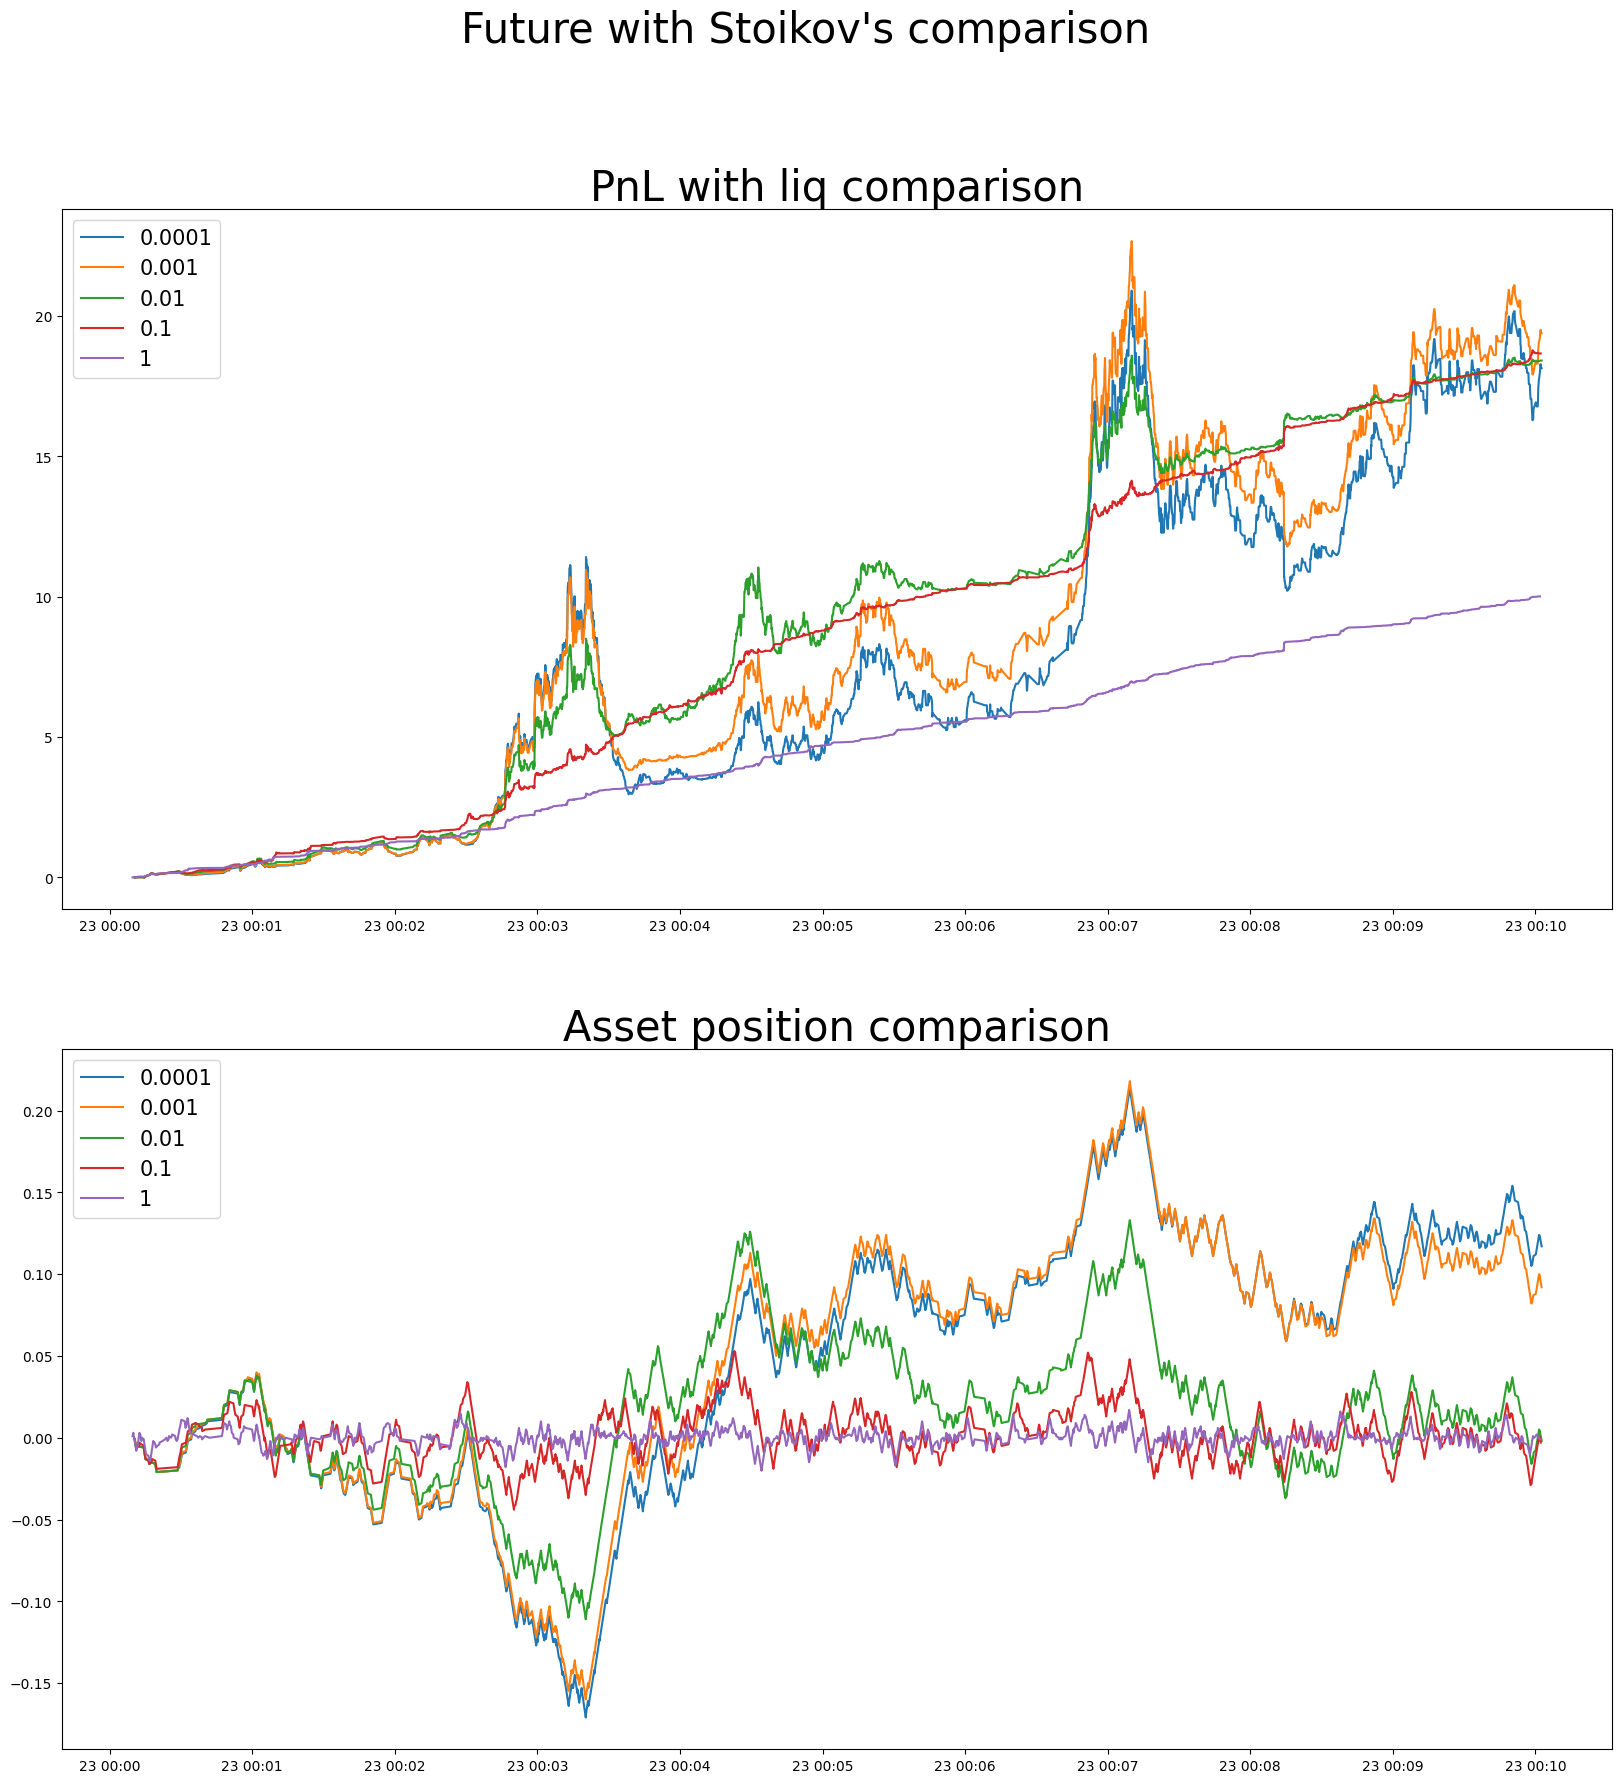

In [13]:
fig, axs = plt.subplots(2, figsize=(20, 20))
fig.suptitle("Future with Stoikov's comparison ", fontsize=30)

for gamma in gammas:
    logs_2 = run_Future_Stoikov(gamma=gamma)
    axs[0].plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['pnl_with_liq'], label=str(gamma))
    axs[1].plot(pd.to_datetime(logs_2['own_trade_time']), logs_2['asset_position'], label=str(gamma))

axs[0].set_title("PnL with liq comparison", fontsize=30)
axs[1].set_title("Asset position comparison", fontsize=30)

axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)

plt.plot()
plt.show()